In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import HTML
from tqdm import tqdm_notebook as tqdm

from neupy import utils
from neupy.algorithms import GrowingNeuralGas as GNG

utils.reproducible()

In [83]:
df = pd.read_csv('./data/breast_cancer.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


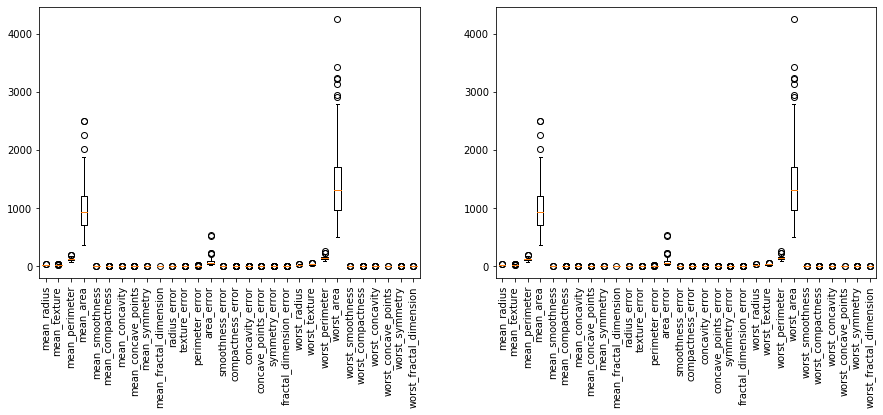

In [84]:
m = df[df['class'] == 0]
b = df[df['class'] == 1]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
boxes = []
for col in df.columns[:-1]:
    boxes.append(m[col].values)
_ = ax[0].boxplot(boxes)
_ = ax[0].set_xticklabels(df.columns[:-1], rotation=90)

boxes = []
for col in df.columns[:-1]:
    boxes.append(m[col].values)
_ = ax[1].boxplot(boxes)
_ = ax[1].set_xticklabels(df.columns[:-1], rotation=90)

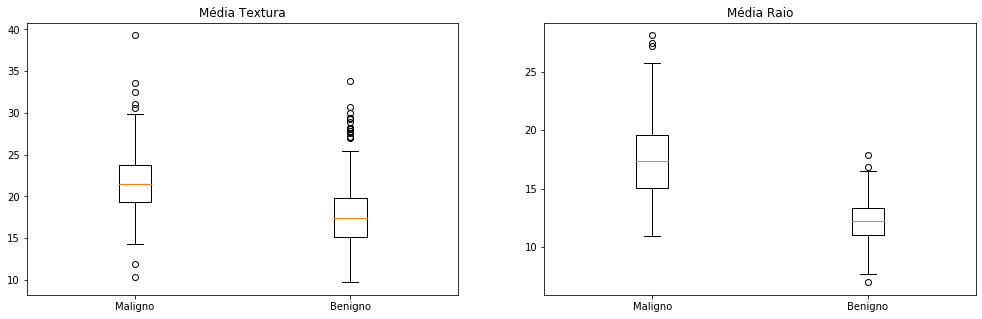

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
ax[0].set_title('Média Textura')
_ = ax[0].boxplot([df[df["class"] == 0]['mean_texture'].values,
            df[df["class"] == 1]['mean_texture'].values])
_ = ax[0].set_xticklabels(['Maligno', 'Benigno'])

ax[1].set_title('Média Raio')
_ = ax[1].boxplot([df[df["class"] == 0]['mean_radius'].values,
            df[df["class"] == 1]['mean_radius'].values])
_ = ax[1].set_xticklabels(['Maligno', 'Benigno'])

plt.savefig('results/box_bc.pdf', dpi=100, bbox_inches='tight', transparent=False, pad_inches=0.1)

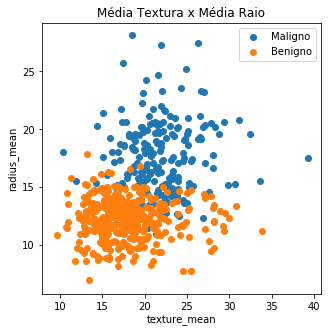

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('Média Textura x Média Raio')
ax.scatter(df[df["class"] == 0]['mean_texture'].values,
            df[df["class"] == 0]['mean_radius'].values, label='Maligno')
ax.scatter(df[df["class"] == 1]['mean_texture'].values,
            df[df["class"] == 1]['mean_radius'].values, label='Benigno')

ax.set_xlabel('texture_mean')
ax.set_ylabel('radius_mean')
ax.legend()


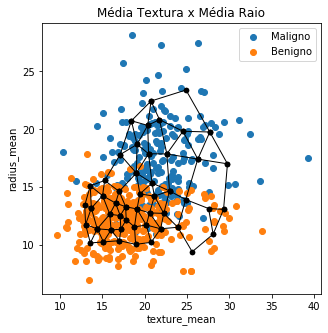

In [100]:
nodes, max_age, max_nodes = 2, 25, 50

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('Média Textura x Média Raio')
ax.scatter(df[df["class"] == 0]['mean_texture'].values,
            df[df["class"] == 0]['mean_radius'].values, label='Maligno')
ax.scatter(df[df["class"] == 1]['mean_texture'].values,
            df[df["class"] == 1]['mean_radius'].values, label='Benigno')

ax.set_xlabel('texture_mean')
ax.set_ylabel('radius_mean')
ax.legend()


data = df[['mean_texture', 'mean_radius']].values
gng = GNG(n_inputs=nodes, max_edge_age=max_age, max_nodes=max_nodes)


gng.train(data, epochs=500)

for node_1, node_2 in gng.graph.edges:
#     print(node_2.weight)
    weights = np.concatenate([node_1.weight, node_2.weight])
    plt.plot(*weights.T, color='k', linewidth=1)
    plt.scatter(*weights.T, color='k', s=20)

idx:  0


idx:  1


idx:  2


idx:  3


idx:  4


idx:  5


idx:  6


idx:  7


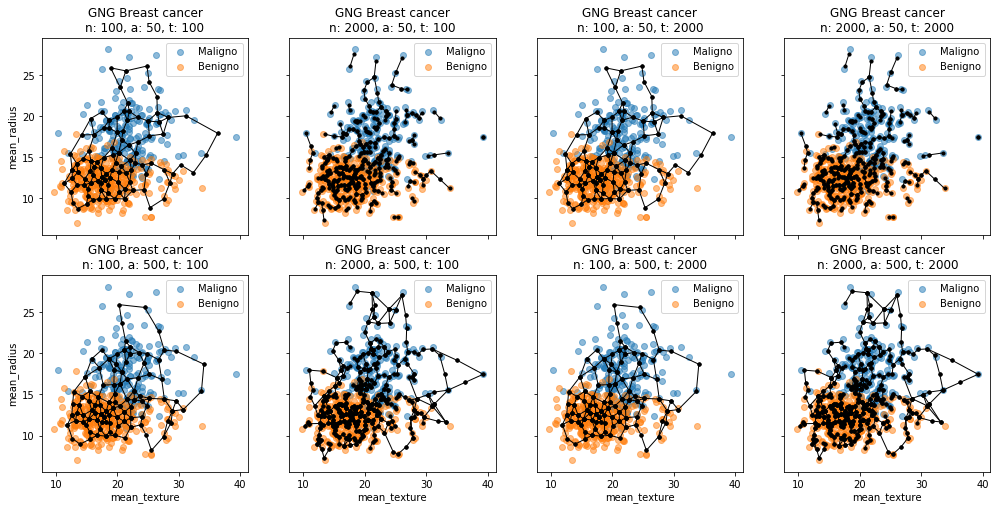

In [101]:
fig, ax = plt.subplots(2, 4, figsize=(17, 8), sharex=True, sharey=True)

max_edge_ages = [50, 500] #default 100
n_iter_before_neuron_added = [100, 2000] # default 1000
n_nodes = [100, 2000] #default 1000

idxs = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]
idx = 0
for age in max_edge_ages:
    for it in n_iter_before_neuron_added:
        for node in n_nodes:
            print('idx: ', idx)
            x, y = idxs[idx][0], idxs[idx][1]
            gng = GNG(n_inputs=2, max_edge_age=age, max_nodes=node)
            gng.train(data, 500)
            ax[x][y].set_title('GNG Breast cancer\nn: %s, a: %s, t: %s'%(node, age, it))
            ax[x][y].scatter(df[df["class"] == 0]['mean_texture'].values,
                        df[df["class"] == 0]['mean_radius'].values, label='Maligno', alpha=.5)
            ax[x][y].scatter(df[df["class"] == 1]['mean_texture'].values,
                        df[df["class"] == 1]['mean_radius'].values, label='Benigno', alpha=.5)
            
            if x == 1:
                ax[x][y].set_xlabel('mean_texture')
            if y == 0:
                ax[x][y].set_ylabel('mean_radius')
            ax[x][y].legend()
            
            for node_1, node_2 in gng.graph.edges:
                weights = np.concatenate([node_1.weight, node_2.weight])
                ax[x][y].plot(*weights.T, color='k', linewidth=1)
                ax[x][y].scatter(*weights.T, color='k', s=10)
            
            idx+=1

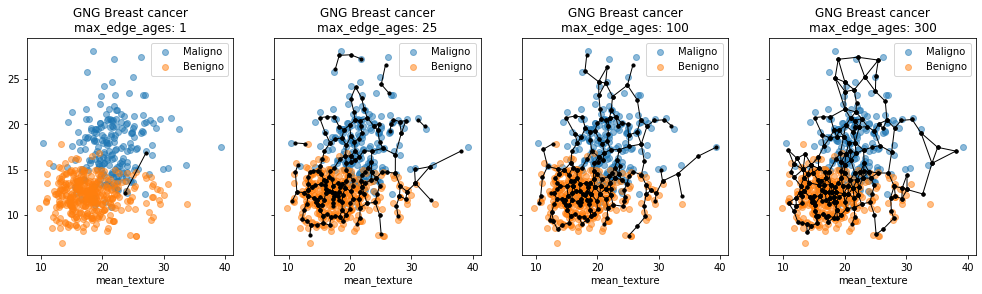

In [105]:
fig, ax = plt.subplots(1, 4, figsize=(17, 4), sharex=True, sharey=True)

max_edge_ages = [1, 25, 100, 300]
# n_iter_before_neuron_added = [100, 2000]
# n_nodes = [100, 2000]

for i, age in enumerate(max_edge_ages):
    gng = GNG(n_inputs=2, max_edge_age=age)
    gng.train(data, 300)
    ax[i].set_title('GNG Breast cancer\nmax_edge_ages: %s'%age)
    ax[i].scatter(df[df["class"] == 0]['mean_texture'].values,
                df[df["class"] == 0]['mean_radius'].values, label='Maligno', alpha=.5)
    ax[i].scatter(df[df["class"] == 1]['mean_texture'].values,
                df[df["class"] == 1]['mean_radius'].values, label='Benigno', alpha=.5)

    if x == 1:
        ax[i].set_xlabel('mean_texture')
    if y == 0:
        ax[i].set_ylabel('mean_radius')
    ax[i].legend()

    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        ax[i].plot(*weights.T, color='k', linewidth=1)
        ax[i].scatter(*weights.T, color='k', s=10)
        
plt.savefig('./results/gng_002_age.pdf', dpi=200, bbox_inches='tight', transparent=False, pad_inches=0.1)

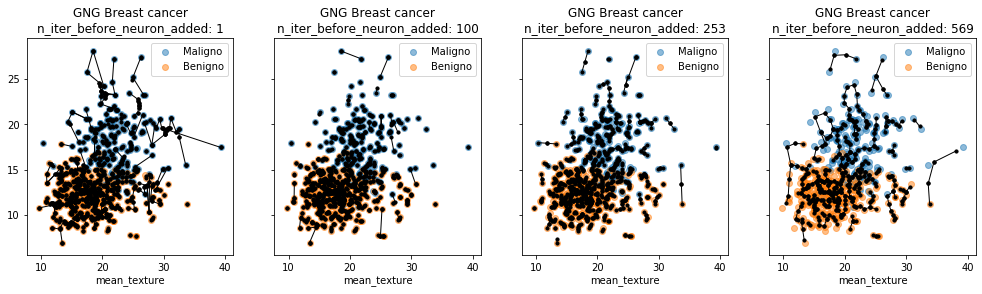

In [109]:
fig, ax = plt.subplots(1, 4, figsize=(17, 4), sharex=True, sharey=True)

# max_edge_ages = [1, 25, 100, 500]
n_iter_before_neuron_added = [1, 100, 253, 569]
# n_nodes = [100, 2000]

for i, time in enumerate(n_iter_before_neuron_added):
    gng = GNG(n_inputs=2, n_iter_before_neuron_added=time)
    gng.train(data, 300)
    ax[i].set_title('GNG Breast cancer\nn_iter_before_neuron_added: %s'%time)
    ax[i].scatter(df[df["class"] == 0]['mean_texture'].values,
                df[df["class"] == 0]['mean_radius'].values, label='Maligno', alpha=.5)
    ax[i].scatter(df[df["class"] == 1]['mean_texture'].values,
                df[df["class"] == 1]['mean_radius'].values, label='Benigno', alpha=.5)

    if x == 1:
        ax[i].set_xlabel('mean_texture')
    if y == 0:
        ax[i].set_ylabel('mean_radius')
    ax[i].legend()

    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        ax[i].plot(*weights.T, color='k', linewidth=1)
        ax[i].scatter(*weights.T, color='k', s=10)
        
plt.savefig('./results/gng_002_time.pdf', dpi=200, bbox_inches='tight', transparent=False, pad_inches=0.1)

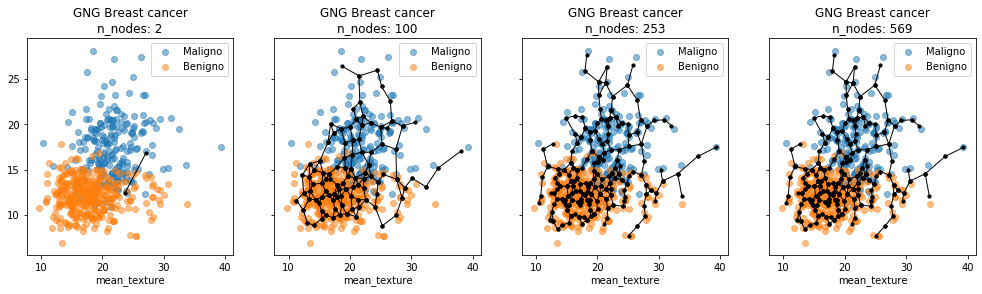

In [110]:
fig, ax = plt.subplots(1, 4, figsize=(17, 4), sharex=True, sharey=True)

# max_edge_ages = [1, 25, 100, 500]
# n_iter_before_neuron_added = [1, 50, 100, 150]
n_nodes = [2, 100, 253, 569]

for i, nodes in enumerate(n_nodes):
    gng = GNG(n_inputs=2, max_nodes=nodes)
    gng.train(data, 300)
    ax[i].set_title('GNG Breast cancer\nn_nodes: %s'%nodes)
    ax[i].scatter(df[df["class"] == 0]['mean_texture'].values,
                df[df["class"] == 0]['mean_radius'].values, label='Maligno', alpha=.5)
    ax[i].scatter(df[df["class"] == 1]['mean_texture'].values,
                df[df["class"] == 1]['mean_radius'].values, label='Benigno', alpha=.5)

    if x == 1:
        ax[i].set_xlabel('mean_texture')
    if y == 0:
        ax[i].set_ylabel('mean_radius')
    ax[i].legend()

    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        ax[i].plot(*weights.T, color='k', linewidth=1)
        ax[i].scatter(*weights.T, color='k', s=10)
        
plt.savefig('./results/gng_002_nodes.pdf', dpi=200, bbox_inches='tight', transparent=False, pad_inches=0.1)